<a href="https://colab.research.google.com/github/Gowr93/Project_Repository_GowriCS/blob/main/Linear_Regression_Student_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Performance Analysis and Prediction**

Student performance analysis and prediction using datasets has become an essential component of modern education systems.
Using Machine learning algorithm to gain insights
into student performance and predict future outcomes


## Understanding the Problem Statement

This project understands how the student’s performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, and Lunch and Test preparation course.


# Data Collection

Dataset : '/StudentPerformance[1].csv'

In [1]:
# Importing Pandas, Numpy, Seaborn, Matplotlib and Warnings Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Data Loading

stud_perf = pd.read_csv("/content/StudentsPerformance[1].csv")

In [3]:
# Data Volume
stud_perf.shape

(1000, 8)

In [5]:
print("Number of Rows: {}".format(stud_perf.shape[00]))
print("Number of Columns: {} ".format(stud_perf.shape[1]))

Number of Rows: 1000
Number of Columns: 8 


In [6]:
# Displaying the first 5 columns from the dataset
stud_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
# Review the Structure of Dataset
stud_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Checks

-->Check Missing values

-->Check Duplicates

-->Check data type

-->Check the number of unique values in each column

-->Check the statistics of the data set

-->Check various categories present in the          different categorical columst item




In [8]:
# To Check the missing values

stud_perf.isnull().sum()

# NO missing values found

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [9]:
# To check the duplicate values

stud_perf.duplicated().sum()

# No duplicate values found


np.int64(0)

In [10]:
# To check the number of uniques

stud_perf.nunique()



,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [14]:
stud_perf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Insight

    The numerical data shown above shows that all means are fairly similar to one another, falling between 66 and 68.05.

    The range of all standard deviations, between 14.6 and 15.19, is also narrow.

    While there is a minimum score of 0 for math, the minimums for writing and reading are substantially higher at 10 and 17, respectively.
    
    We don’t have any duplicate or missing values, and the following codes will provide a good data checking.


## Exploratory Data Anaylsis.

In [18]:
# Unique values in a readable way
print(" Categories in 'Gender' variable:", end = " ")
print('\n',stud_perf['gender'].unique())
print("Categories in 'race/ethnicity' variable:", end = " ")
print('\n',stud_perf['race/ethnicity'].unique())
print("Categories in 'parental level of education' variable:", end = " ")
print('\n',stud_perf['parental level of education'].unique())
print("Categories in 'lunch' variable:", end = " ")
print('\n',stud_perf['lunch'].unique())

 Categories in 'Gender' variable: 
 ['female' 'male']
Categories in 'race/ethnicity' variable: 
 ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: 
 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable: 
 ['standard' 'free/reduced']


In [26]:
# Define the numerical and categorical  columns

numerical_features = [ feature for feature in stud_perf.columns  if stud_perf[feature].dtype != "object"]
categorical_features = [ feature for feature in stud_perf.columns if stud_perf[feature].dtype == "object"]
print (" {} Numerical features : {}".format(len(numerical_features), numerical_features))
print('\n')
print("{} Categorical featues: {}".format(len(categorical_features), categorical_features))



 3 Numerical features : ['math score', 'reading score', 'writing score']


5 Categorical featues: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

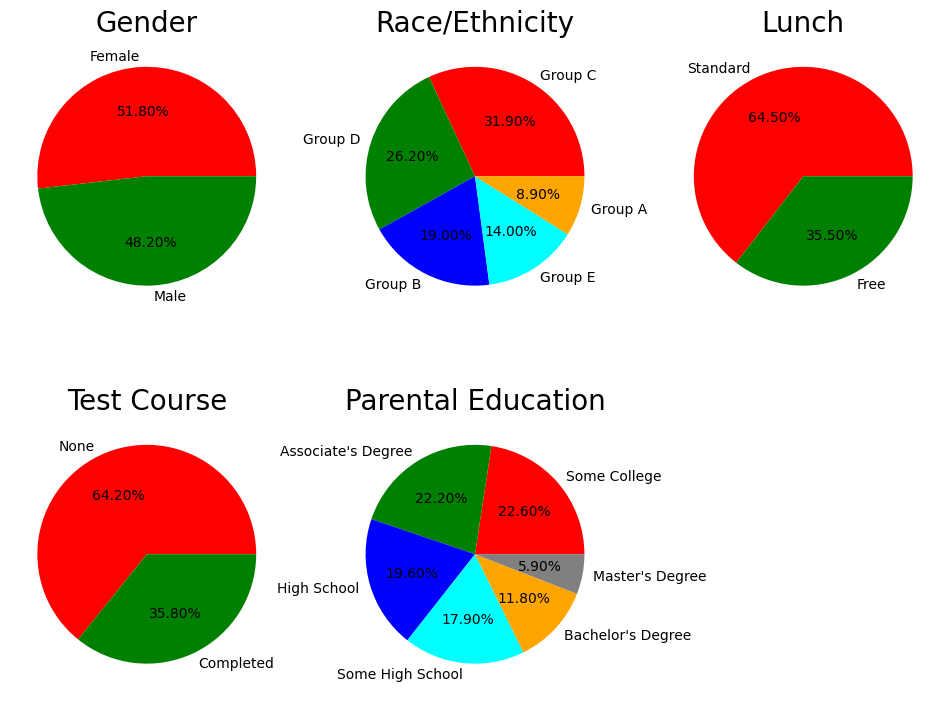

In [36]:
# Set figure size
plt.rcParams['figure.figsize'] = (12, 9)

# First row of pie charts
plt.subplot(2, 3, 1)
size = stud_perf['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 2)
size = stud_perf['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 3)
size = stud_perf['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

# Second row of pie charts
plt.subplot(2, 3, 4)
size = stud_perf['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(2, 3, 5)
size = stud_perf['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Education', fontsize=20)
plt.show

Insights
Gender has balanced data

Female - 48.2%

Male - 51.8%

"""

    The number of Male and Female students is almost equal.
    The number of students is higher in Group C.
    The number of students who have standard lunch is greater.
    The number of students who have not enrolled in any test preparation course is greater.
    The number of students whose parental education is “Some College” is greater followed closely by “Associate’s Degree”.

From the above plot, it is clear that all the scores increase linearly with each other.

Student’s Performance is related to lunch, race, and parental level education.

    Females lead in pass percentage and also are top-scorers.
    Student Performance is not much related to test preparation course.
    The finishing preparation course is beneficial.
"""

splitting the X and y Variables

"""This separation of the dependent variable(y) and independent variables(X) is one the most important in our project we use the math score as a dependent variable. Because so many students lack in math subjects it will almost 60% to 70% of students in classes 7-10 students are fear of math subjects that’s why I am choosing the math score as a dependent score."""

In [38]:
X = stud_perf.drop(columns = 'math score', axis = 1)
y = stud_perf['math score']

## Standardization - Numerical Transformation
## Encoding - Categorical Transformation - One HotEncoder

In [46]:
# we dont have any order/rank in categories so we use one hot encoder

num_features = X.select_dtypes(exclude = "object").columns
cat_features = X.select_dtypes(include = "object").columns

# importing necessary libraries

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

# intialize the StandardScaler, OneHotEncoder
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer( [ ("OneHotEncoder", oh_transformer, cat_features), ("StandardScaler", numeric_transformer, num_features), ] )

X = preprocessor.fit_transform(X)

Separating the Dataset into Train and Test

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)
print("Train Data Shape:", X_train.shape)
print("Test Data Shape:", X_test.shape)

Train Data Shape: (800, 19)
Test Data Shape: (200, 19)


## Model Building

In [51]:
# Importing Libraries and required Package

from sklearn.metrics import root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [61]:
model = LinearRegression()
model.fit(X_train,y_train)


LinearRegression()

In [71]:
# Make Predictions
# For Training Datast
y_train_pred = model.predict(X_train)
#For Testing Dataset
y_test_pred = model.predict(X_test)


In [74]:
# Calculate the Evaluation Metrics
mae = mean_absolute_error(y_train,y_train_pred)
mse = mean_squared_error(y_train,y_train_pred)
rmse = np.sqrt(mse) # RMSE is not directly available
r2 = r2_score(y_train,y_train_pred)

# Printing the Evaluation Metrics for Training Dataset
print ("-----Evaluation Metrics for Training Dataset------")
print(f"Mean Absolute Error (MAE): {mae : .2f}")
print(f"Mean Squared Error(MSE): {mse : .2f}")
print(f"Root Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared (R2): {r2 : .2f}")

-----Evaluation Metrics for Training Dataset------
Mean Absolute Error (MAE):  4.27
Mean Squared Error(MSE):  28.33
Root Squared Error (RMSE): 5.32
R-Squared (R2):  0.87


In [75]:
# Calculate the Evaluation Metrics
mae_1 = mean_absolute_error(y_test,y_test_pred)
mse_1 = mean_squared_error(y_test,y_test_pred)
rmse_1= np.sqrt(mse) # RMSE is not directly available
r2_1= r2_score(y_test,y_test_pred)

# Printing the Evaluation Metrics for Testing Dataset
print ("-----Evaluation Metrics for Testing Dataset------")
print(f"Mean Absolute Error (MAE): {mae_1 : .2f}")
print(f"Mean Squared Error(MSE): {mse_1 : .2f}")
print(f"Root Squared Error (RMSE): {rmse_1:.2f}")
print(f"R-Squared (R2): {r2_1 : .2f}")

-----Evaluation Metrics for Testing Dataset------
Mean Absolute Error (MAE):  4.21
Mean Squared Error(MSE):  29.10
Root Squared Error (RMSE): 5.32
R-Squared (R2):  0.88


## Visualizing the Linear Regression

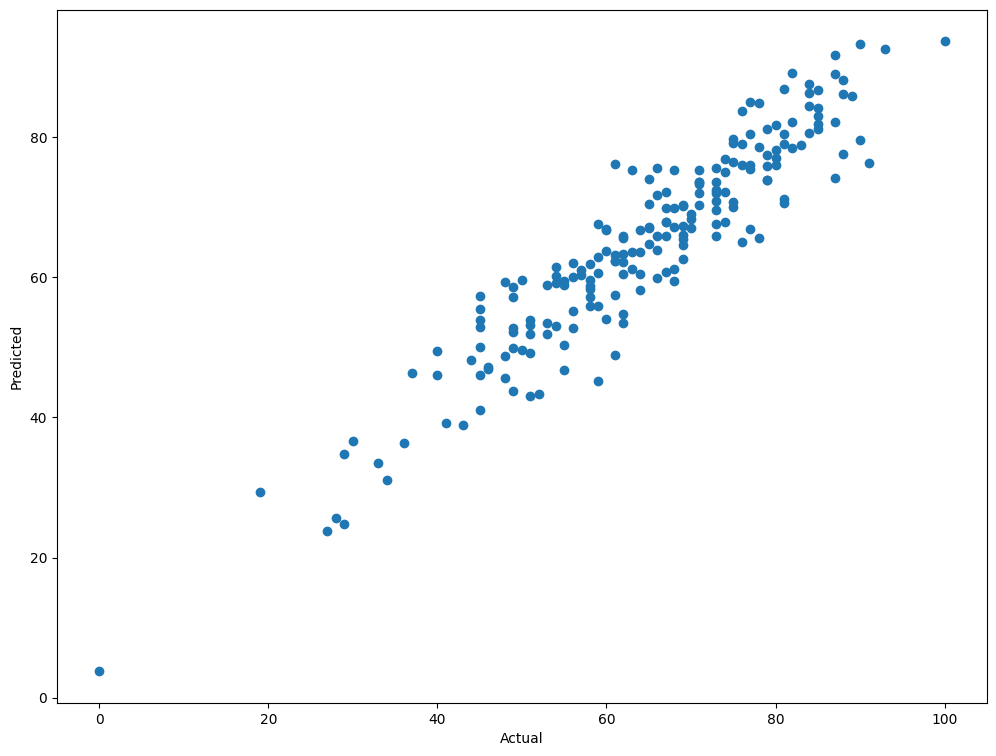

In [76]:
plt.scatter(y_test,y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


<Axes: xlabel='math score'>

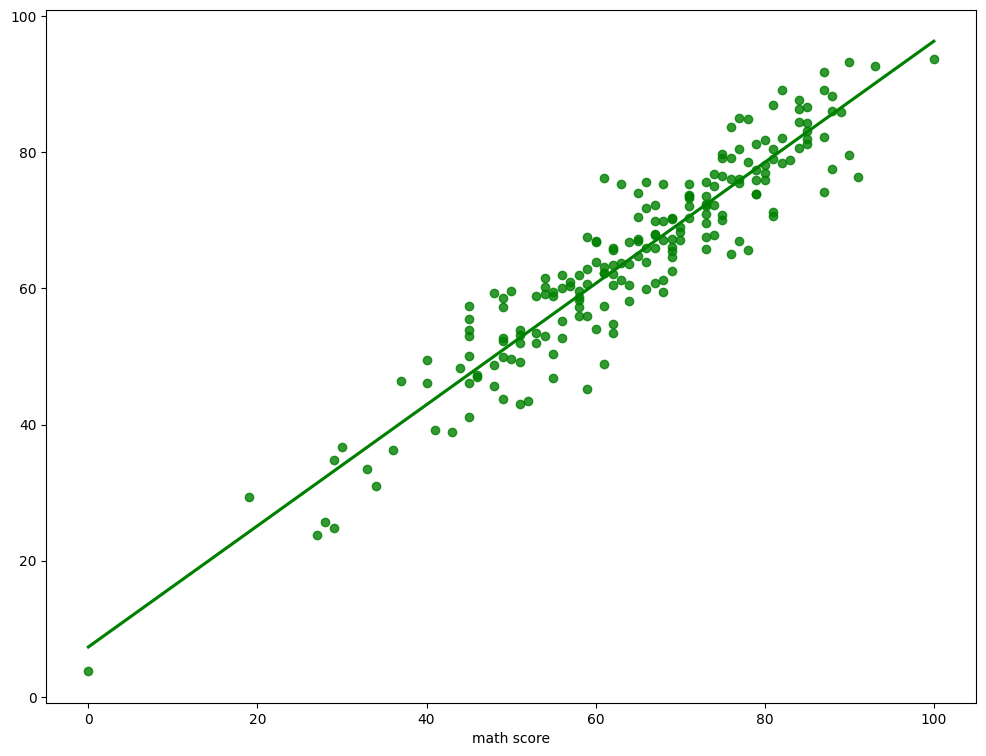

In [77]:
sns.regplot(x=y_test, y = y_test_pred, ci = None, color = 'green')

In [79]:
pred_stud_perf= pd.DataFrame({'Actual Value ': y_test,'Predicted Value': y_test_pred, 'Difference': y_test - y_test_pred})
pred_stud_perf

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
